In [10]:
import h5py, os
import scipy as sp
from pyod.utils import precision_n_scores
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.gmm import GMM
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from sklearn.utils import column_or_1d, check_consistent_length
import seaborn as sns
from pyod.utils import generate_data
from pyod.utils.data import get_outliers_inliers
from scipy.stats import stats


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 计算AUC值和P@N值

In [2]:
def anomaly_detection(algorithm, X, y, info=None):
    # standardize data to be digestible for most algorithms
    X = StandardScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    # 训练和测试模型
    algorithm.fit(X_train)

    y = column_or_1d(y_test)
    y_pred = column_or_1d(algorithm.decision_function(X_test))
    check_consistent_length(y, algorithm.decision_function(X_test))

    roc = np.round(roc_auc_score(y, y_pred), decimals=4)
    prn = np.round(precision_n_scores(y, y_pred), decimals=4)

    print('{clf_name} ROC:{roc}, precision @ rank n:{prn}'.format(
        clf_name=info,
        roc=roc,
        prn=prn))

    return roc, prn

# 选取4个模型和8个分类器

In [3]:
mat_file_list = [
    'mnist.mat',
    'arrhythmia.mat',
    'breastw.mat',
    'cardio.mat',
]

# 创建一个dictionary并添加要用于检测异常值的所有模型
classifiers = {
    'PCA': PCA(),
    'OCSVM': OCSVM(),
    'LOF': LOF(),
    'HBOS': HBOS(),
    'GMM': GMM(),
    'KNN': KNN(),
    'IForest': IForest(),
    'Feature Bagging': FeatureBagging(),
}

num_experiments = 10  # 设置实验次数


# 生成数据集

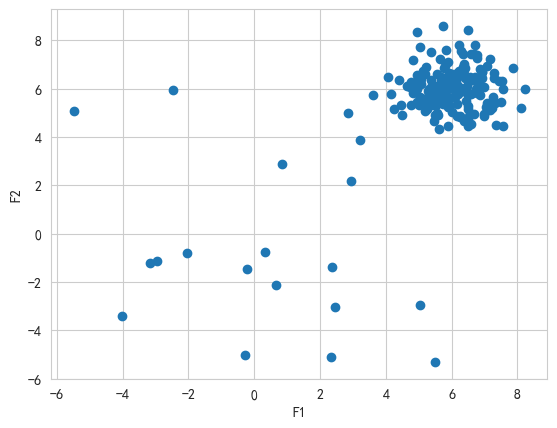


1 fitting PCA
-12.372250842966784


C:\Users\ishine\AppData\Local\Temp\ipykernel_9268\2342858253.py:51: DeprecationWarning: Please use `scoreatpercentile` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  threshold = stats.scoreatpercentile(scores_pred,



2 fitting OCSVM
-16.039222615322593


C:\Users\ishine\AppData\Local\Temp\ipykernel_9268\2342858253.py:51: DeprecationWarning: Please use `scoreatpercentile` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  threshold = stats.scoreatpercentile(scores_pred,



3 fitting LOF
-1.6923558023097662

4 fitting HBOS
-4.5312487077182055

5 fitting GMM
-4.348252559227991

6 fitting KNN
-1.0018703450137612


C:\Users\ishine\AppData\Local\Temp\ipykernel_9268\2342858253.py:51: DeprecationWarning: Please use `scoreatpercentile` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  threshold = stats.scoreatpercentile(scores_pred,
C:\Users\ishine\AppData\Local\Temp\ipykernel_9268\2342858253.py:51: DeprecationWarning: Please use `scoreatpercentile` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  threshold = stats.scoreatpercentile(scores_pred,
C:\Users\ishine\AppData\Local\Temp\ipykernel_9268\2342858253.py:51: DeprecationWarning: Please use `scoreatpercentile` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  threshold = stats.scoreatpercentile(scores_pred,
C:\Users\ishine\AppData\Local\Temp\ipykernel_9268\2342858253.py:51: DeprecationWarning: Please use `scoreatpercentile` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  threshold = stats.scoreatpercentile(s


7 fitting IForest
2.3852447794681098e-18


C:\Users\ishine\AppData\Local\Temp\ipykernel_9268\2342858253.py:51: DeprecationWarning: Please use `scoreatpercentile` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  threshold = stats.scoreatpercentile(scores_pred,



8 fitting Feature Bagging
-1.7861730675307115


C:\Users\ishine\AppData\Local\Temp\ipykernel_9268\2342858253.py:51: DeprecationWarning: Please use `scoreatpercentile` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  threshold = stats.scoreatpercentile(scores_pred,


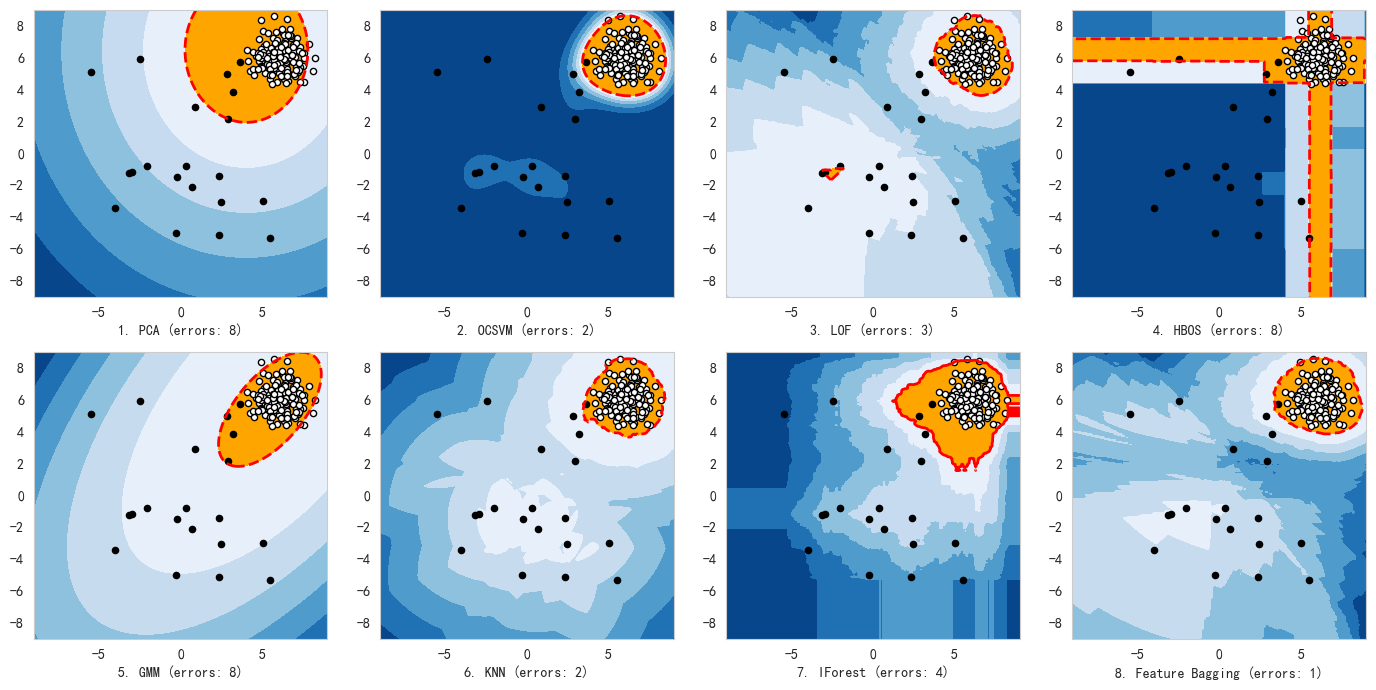

In [11]:
# 创建一个带有异常值的随机数据集并绘制它
# generate random data with two features
X_train, Y_train = generate_data(n_train=200, train_only=True, n_features=2, random_state=42)
# by default the outlier fraction is 0.1 in generate data function
outlier_fraction = 0.1
# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train, Y_train)
n_inliers = len(x_inliers)
n_outliers = len(x_outliers)
# separate the two features and use it to plot the data
F1 = X_train[:, [0]].reshape(-1, 1)
F2 = X_train[:, [1]].reshape(-1, 1)
# create a meshgrid
xx, yy = np.meshgrid(np.linspace(-9, 9, 200), np.linspace(-9, 9, 200))
# scatter plot
plt.scatter(F1, F2)
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

# 创建一个dictionary并添加要用于检测异常值的所有模型
classifiers = {
    'PCA': PCA(contamination=outlier_fraction),
    'OCSVM': OCSVM(contamination=outlier_fraction, ),
    'LOF': LOF(contamination=outlier_fraction),
    # 'COF': COF(contamination=outlier_fraction),
    'HBOS': HBOS(contamination=outlier_fraction),
    # 'ABOD': ABOD(contamination=outlier_fraction),
    'GMM': GMM(contamination=outlier_fraction),
    'KNN': KNN(contamination=outlier_fraction),
    # 'CBLOF': CBLOF(contamination=outlier_fraction),
    'IForest': IForest(contamination=outlier_fraction),
    'Feature Bagging': FeatureBagging(contamination=outlier_fraction),
    # 'LOCI': LOCI(contamination=outlier_fraction, ),
    # 'MCD': MCD(contamination=outlier_fraction, ),

    # 'SOD': SOD(contamination=outlier_fraction, ),

}
# 将数据拟合到我们在dictionary中添加的每个模型，然后，查看每个模型如何检测异常值
# set the figure size

plt.figure(figsize=(14, 7))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    print()
    print(i + 1, 'fitting', clf_name)
    # fit the data and tag outliers
    clf.fit(X_train)
    scores_pred = clf.decision_function(X_train) * -1
    y_pred = clf.predict(X_train)
    threshold = stats.scoreatpercentile(scores_pred,
                                        100 * outlier_fraction)
    print(threshold)
    n_errors = (y_pred != Y_train).sum()
    # plot the levels lines and the points

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(2, 4, i + 1)
    subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
    a = subplot.contour(xx, yy, Z, levels=[threshold],
                        linewidths=2, colors='red')
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',
                        s=20, edgecolor='k')
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',
                        s=20, edgecolor='k')
    subplot.axis('tight')
    # subplot.legend(
    #     # [a.collections[0], b, c],
    #     ['learned decision function', 'true inliers', 'true outliers'],
    #     prop=matplotlib.font_manager.FontProperties(size=10),
    #     loc='lower right')
    subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
    # subplot.set_xlim((-8, 8))
    # subplot.set_ylim((-7, 7))
plt.tight_layout()
plt.show()


# 训练与测试

In [4]:
rocs = np.zeros((4, 8), dtype=np.float32)
prns = np.zeros((4, 8), dtype=np.float32)

for idx, mat_file in enumerate(mat_file_list):
    mat_file_name = mat_file.replace('.mat', '')
    print("\n... Processing", mat_file_name, '...')

    mat_file_path = os.path.join('', 'data', mat_file)

    try:
        with h5py.File(mat_file_path, 'r') as data:
            X = data['X'][:].T
            y = data['y'][:].T
    except:
        mat = sp.io.loadmat(os.path.join('', 'data', mat_file))
        X = mat['X']
        y = mat['y']

    for j, (name, model) in enumerate(classifiers.items()):
        roc, prn = anomaly_detection(model, X, y, f'{name} for {mat_file_name}')
        rocs[idx, j] = roc
        prns[idx, j] = prn


... Processing mnist ...
PCA for mnist ROC:0.8612, precision @ rank n:0.3903
OCSVM for mnist ROC:0.8613, precision @ rank n:0.3978
LOF for mnist ROC:0.7016, precision @ rank n:0.3271
HBOS for mnist ROC:0.5584, precision @ rank n:0.0967
GMM for mnist ROC:0.8516, precision @ rank n:0.4089
KNN for mnist ROC:0.8405, precision @ rank n:0.4312
IForest for mnist ROC:0.7997, precision @ rank n:0.2788
Feature Bagging for mnist ROC:0.6992, precision @ rank n:0.342

... Processing arrhythmia ...
PCA for arrhythmia ROC:0.8149, precision @ rank n:0.5
OCSVM for arrhythmia ROC:0.8305, precision @ rank n:0.5
LOF for arrhythmia ROC:0.8072, precision @ rank n:0.4286
HBOS for arrhythmia ROC:0.8562, precision @ rank n:0.6071
GMM for arrhythmia ROC:0.814, precision @ rank n:0.3571
KNN for arrhythmia ROC:0.8119, precision @ rank n:0.5
IForest for arrhythmia ROC:0.82, precision @ rank n:0.5
Feature Bagging for arrhythmia ROC:0.8042, precision @ rank n:0.4286

... Processing breastw ...
PCA for breastw ROC:0

In [5]:
rocs

array([[0.8612, 0.8613, 0.7016, 0.5584, 0.8516, 0.8405, 0.7997, 0.6992],
       [0.8149, 0.8305, 0.8072, 0.8562, 0.814 , 0.8119, 0.82  , 0.8042],
       [0.9536, 0.9482, 0.4798, 0.9905, 0.9805, 0.985 , 0.9895, 0.4224],
       [0.9581, 0.9458, 0.6365, 0.8688, 0.9151, 0.7609, 0.9474, 0.6543]],
      dtype=float32)

In [6]:
prns

array([[0.3903, 0.3978, 0.3271, 0.0967, 0.4089, 0.4312, 0.2788, 0.342 ],
       [0.5   , 0.5   , 0.4286, 0.6071, 0.3571, 0.5   , 0.5   , 0.4286],
       [0.93  , 0.9   , 0.28  , 0.9495, 0.93  , 0.92  , 0.94  , 0.1   ],
       [0.6216, 0.527 , 0.2027, 0.527 , 0.4595, 0.4054, 0.5946, 0.2027]],
      dtype=float32)

# 绘图

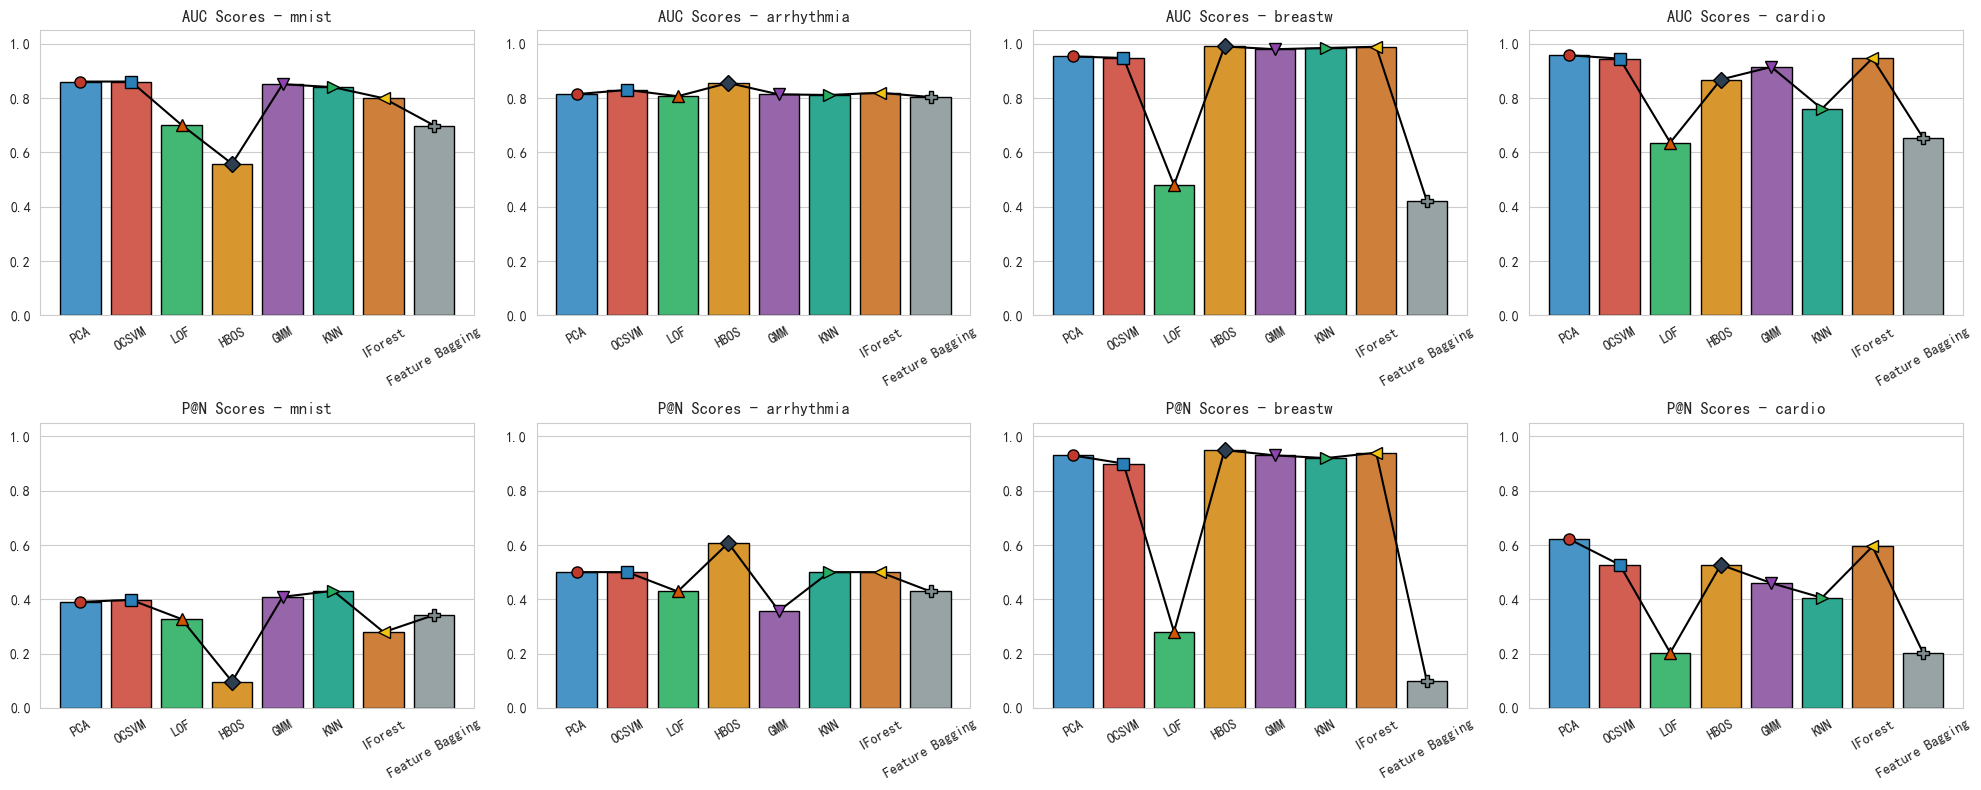

In [7]:
datasets = ['mnist', 'arrhythmia', 'breastw', 'cardio']
algorithms = ['PCA', 'OCSVM', 'LOF', 'HBOS', 'GMM', 'KNN', 'IForest', 'Feature Bagging']

# Plotting AUC and P@10 scores for each dataset
fig, axes = plt.subplots(2, len(datasets), figsize=(20, 8))

bar_width = 0.2
bar_positions = np.arange(len(algorithms))
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'P']
# Define visually appealing colors
bar_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22', '#95a5a6']
marker_colors = ['#c0392b', '#2980b9', '#d35400', '#2c3e50', '#8e44ad', '#27ae60', '#f1c40f', '#7f8c8d']

for i, dataset in enumerate(datasets):
    # Plotting AUC scores with lines
    axes[0, i].plot(bar_positions, rocs[i, :], color='black')
    for j, algorithm in enumerate(algorithms):
        sns.barplot(x=[bar_positions[j]],
                    y=[rocs[i, j]],
                    color=bar_colors[j], edgecolor='black', ax=axes[0, i])
        axes[0, i].plot([bar_positions[j]], [rocs[i, j]],
                        marker=markers[j], markersize=8,
                        markerfacecolor=marker_colors[j], markeredgecolor='black')

    axes[0, i].set_title(f'AUC Scores - {dataset}')
    axes[0, i].set_xticks(bar_positions)
    axes[0, i].set_xticklabels(algorithms, rotation=30)
    axes[0, i].set_ylim(0, 1.05)

    # Plotting P@10 scores with lines
    axes[1, i].plot(bar_positions, prns[i, :], color='black')
    for j, algorithm in enumerate(algorithms):
        sns.barplot(x=[bar_positions[j]],
                    y=[prns[i, j]],
                    color=bar_colors[j], edgecolor='black', ax=axes[1, i])
        axes[1, i].plot([bar_positions[j]], [prns[i, j]],
                        marker=markers[j], markersize=8,
                        markerfacecolor=marker_colors[j], markeredgecolor='black')

    axes[1, i].set_title(f'P@N Scores - {dataset}')
    axes[1, i].set_xticks(bar_positions)
    axes[1, i].set_xticklabels(algorithms, rotation=30)
    axes[1, i].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()
